<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/MNIST_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing relevant libraries
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, MaxPool2D, Conv2D, Dropout, Dense

In [3]:
#load the data
(X_train, y_train), (X_test, y_test)= mnist.load_data()
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [4]:
X_train[0].shape

(28, 28)

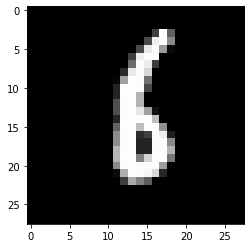

In [5]:
plt.imshow(X_train[1100], cmap= 'gray')

In [6]:
y_train[1100]

6

### Preprocessing the image

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
img_ht= 28
img_wd= 28
Batch_size=64

In [11]:
#Reshaping the image to be acceptable by model
X_train= X_train.reshape(X_train.shape[0], img_ht, img_wd, 1)
X_test= X_test.reshape(X_test.shape[0], img_ht, img_wd, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
y_train= tf.keras.utils.to_categorical(y_train, 10)
y_test= tf.keras.utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [13]:
#Converting the datatype from int to float
X_train.dtype

dtype('uint8')

In [14]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [15]:
#Normalizing the pixel values
X_train= X_train/255
X_test= X_test/255

## Model building

In [16]:
num_classes= 10

model= Sequential([
                   layers.Conv2D(32, kernel_size= (3, 3), activation='relu', input_shape= (img_ht, img_wd, 1)),
                   layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
                   layers.MaxPool2D(),
                   layers.Dropout(0.25),
                   layers.Flatten(),
                   layers.Dense(128, activation='relu'),
                   layers.Dense(64, activation='relu'),
                   layers.Dropout(0.25),
                   layers.Dense(num_classes, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [18]:
#Defining the optimizer, loss and metrics
model.compile(optimizer= tf.keras.optimizers.Adam(), 
              metrics= ['accuracy'],
              loss= tf.keras.losses.categorical_crossentropy)

In [19]:
epochs=20
history= model.fit(X_train, y_train,
                   epochs=epochs,
                   batch_size= Batch_size,
                   verbose=1,
                   validation_data= (X_test, y_test))

Epoch 1/20
938/938 [==============================] - 21s 12ms/step - loss: 0.1808 - accuracy: 0.9443 - val_loss: 0.0440 - val_accuracy: 0.9860
Epoch 2/20
938/938 [==============================] - 11s 11ms/step - loss: 0.0585 - accuracy: 0.9834 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0371 - val_accuracy: 0.9882
Epoch 4/20
938/938 [==============================] - 11s 11ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0385 - val_accuracy: 0.9889
Epoch 5/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.0366 - val_accuracy: 0.9895
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0367 - val_accuracy:

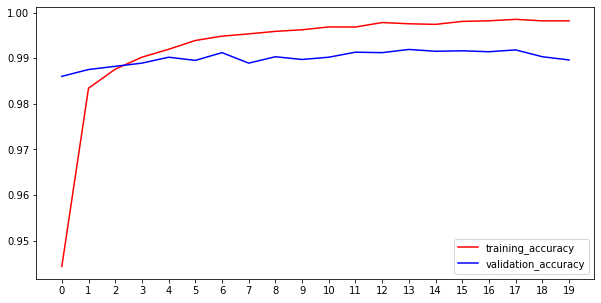

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], color= 'red', label='training_accuracy')
plt.plot(history.history['val_accuracy'], color= 'blue', label='validation_accuracy')
plt.xticks(ticks=range(epochs))
plt.legend()
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9896


[0.0452725924551487, 0.9896000027656555]

Te model is a good model with training accuracy of 99.82 % and validation accuracy of 98.96 %.